<a href="https://colab.research.google.com/github/reduyema21/AI-Group-3/blob/main/Rediet27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("C:/Users/nigus/Desktop/AI-Group-3/Data/water_quality_prediction.csv")


df.columns


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
# Fill or drop missing values
# After dropping missing values (around cell 15)
df = df.dropna()

# Save the processed dataframe to a new CSV file
processed_file_path = "C:/Users/nigus/Desktop/AI-Group-3/Data/water_quality_prediction_processed.csv"
df.to_csv(processed_file_path, index=False)

# Save the processed file to the notebook's folder as well
notebook_folder_file_path = "water_quality_prediction_processed.csv"
df.to_csv(notebook_folder_file_path, index=False)

print(f"Processed data saved to: {processed_file_path}")
print(f"Processed data also saved to notebook folder as: {notebook_folder_file_path}")

Processed data saved to: C:/Users/nigus/Desktop/AI-Group-3/Data/water_quality_prediction_processed.csv
Processed data also saved to notebook folder as: water_quality_prediction_processed.csv


<Axes: >

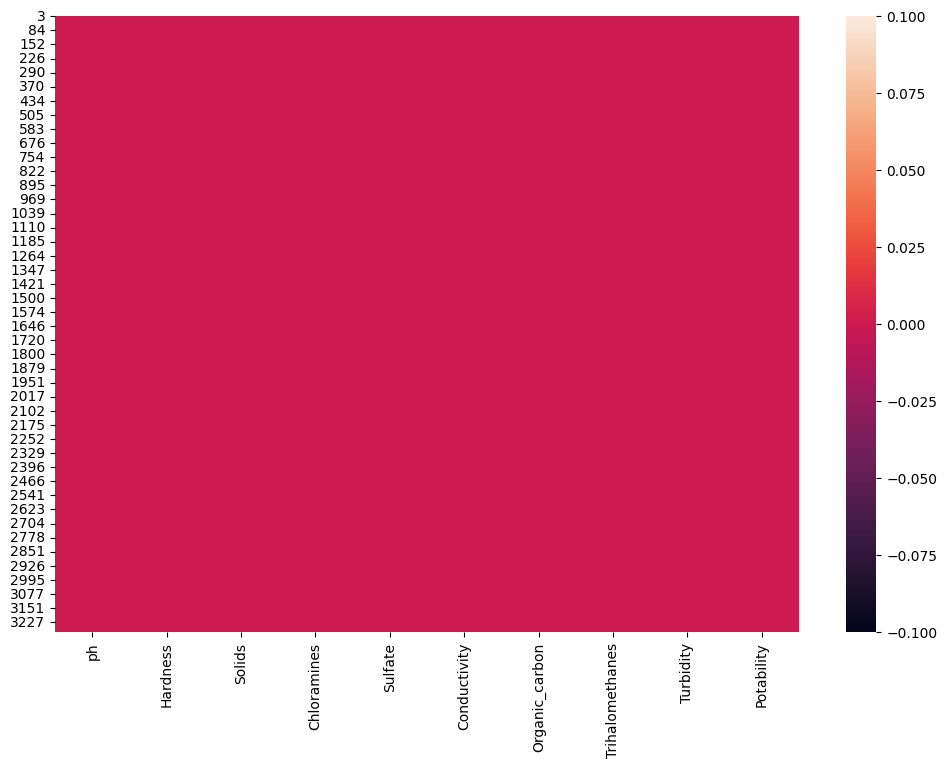

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

<Axes: >

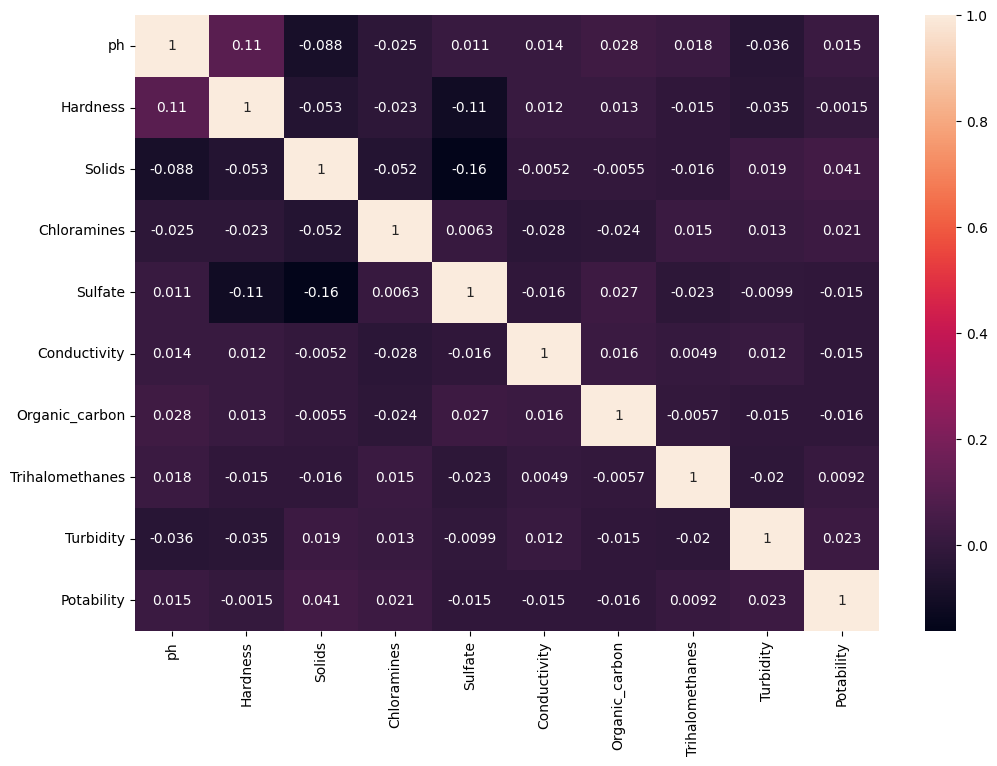

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Potability', ylabel='count'>

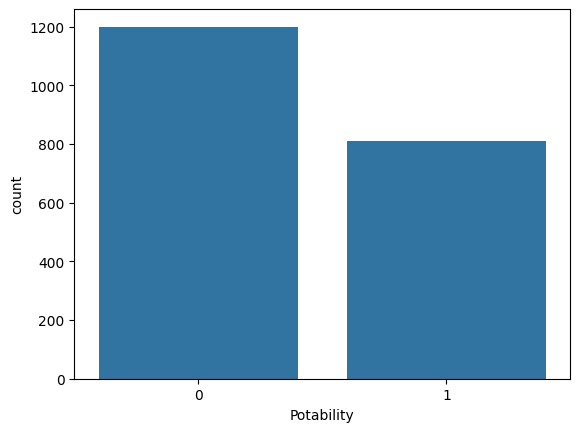

In [10]:
sns.countplot(x="Potability",data=df)

In [11]:
df["Potability"].value_counts()

Potability
0    1200
1     811
Name: count, dtype: int64

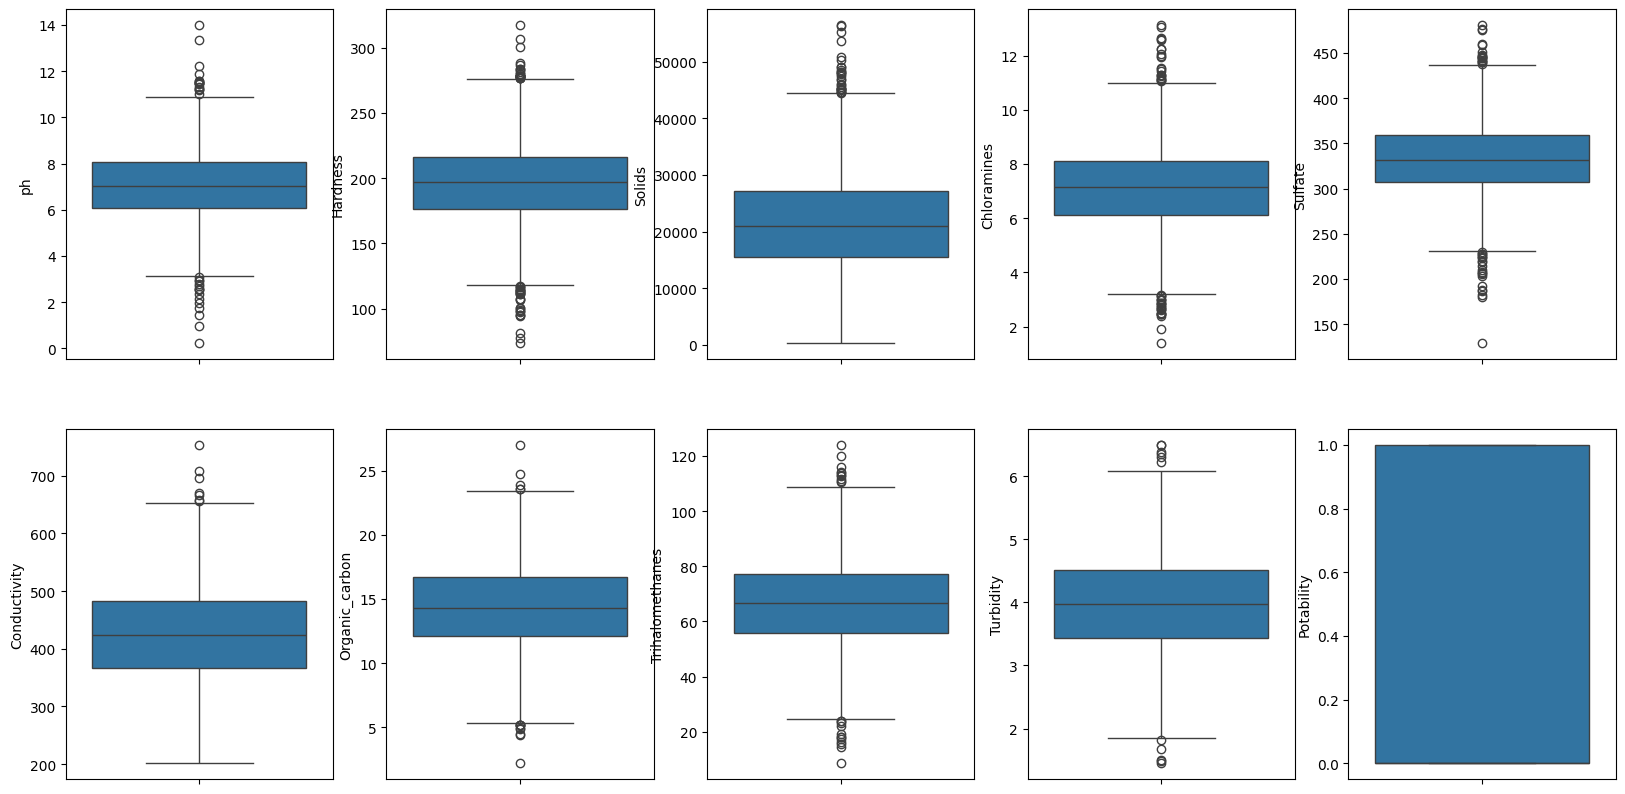

In [12]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize = (20,10))
ax = ax.flatten()
index = 0
for col,values in df.items():
  sns.boxplot(y=col,data=df,ax=ax[index])
  index +=1

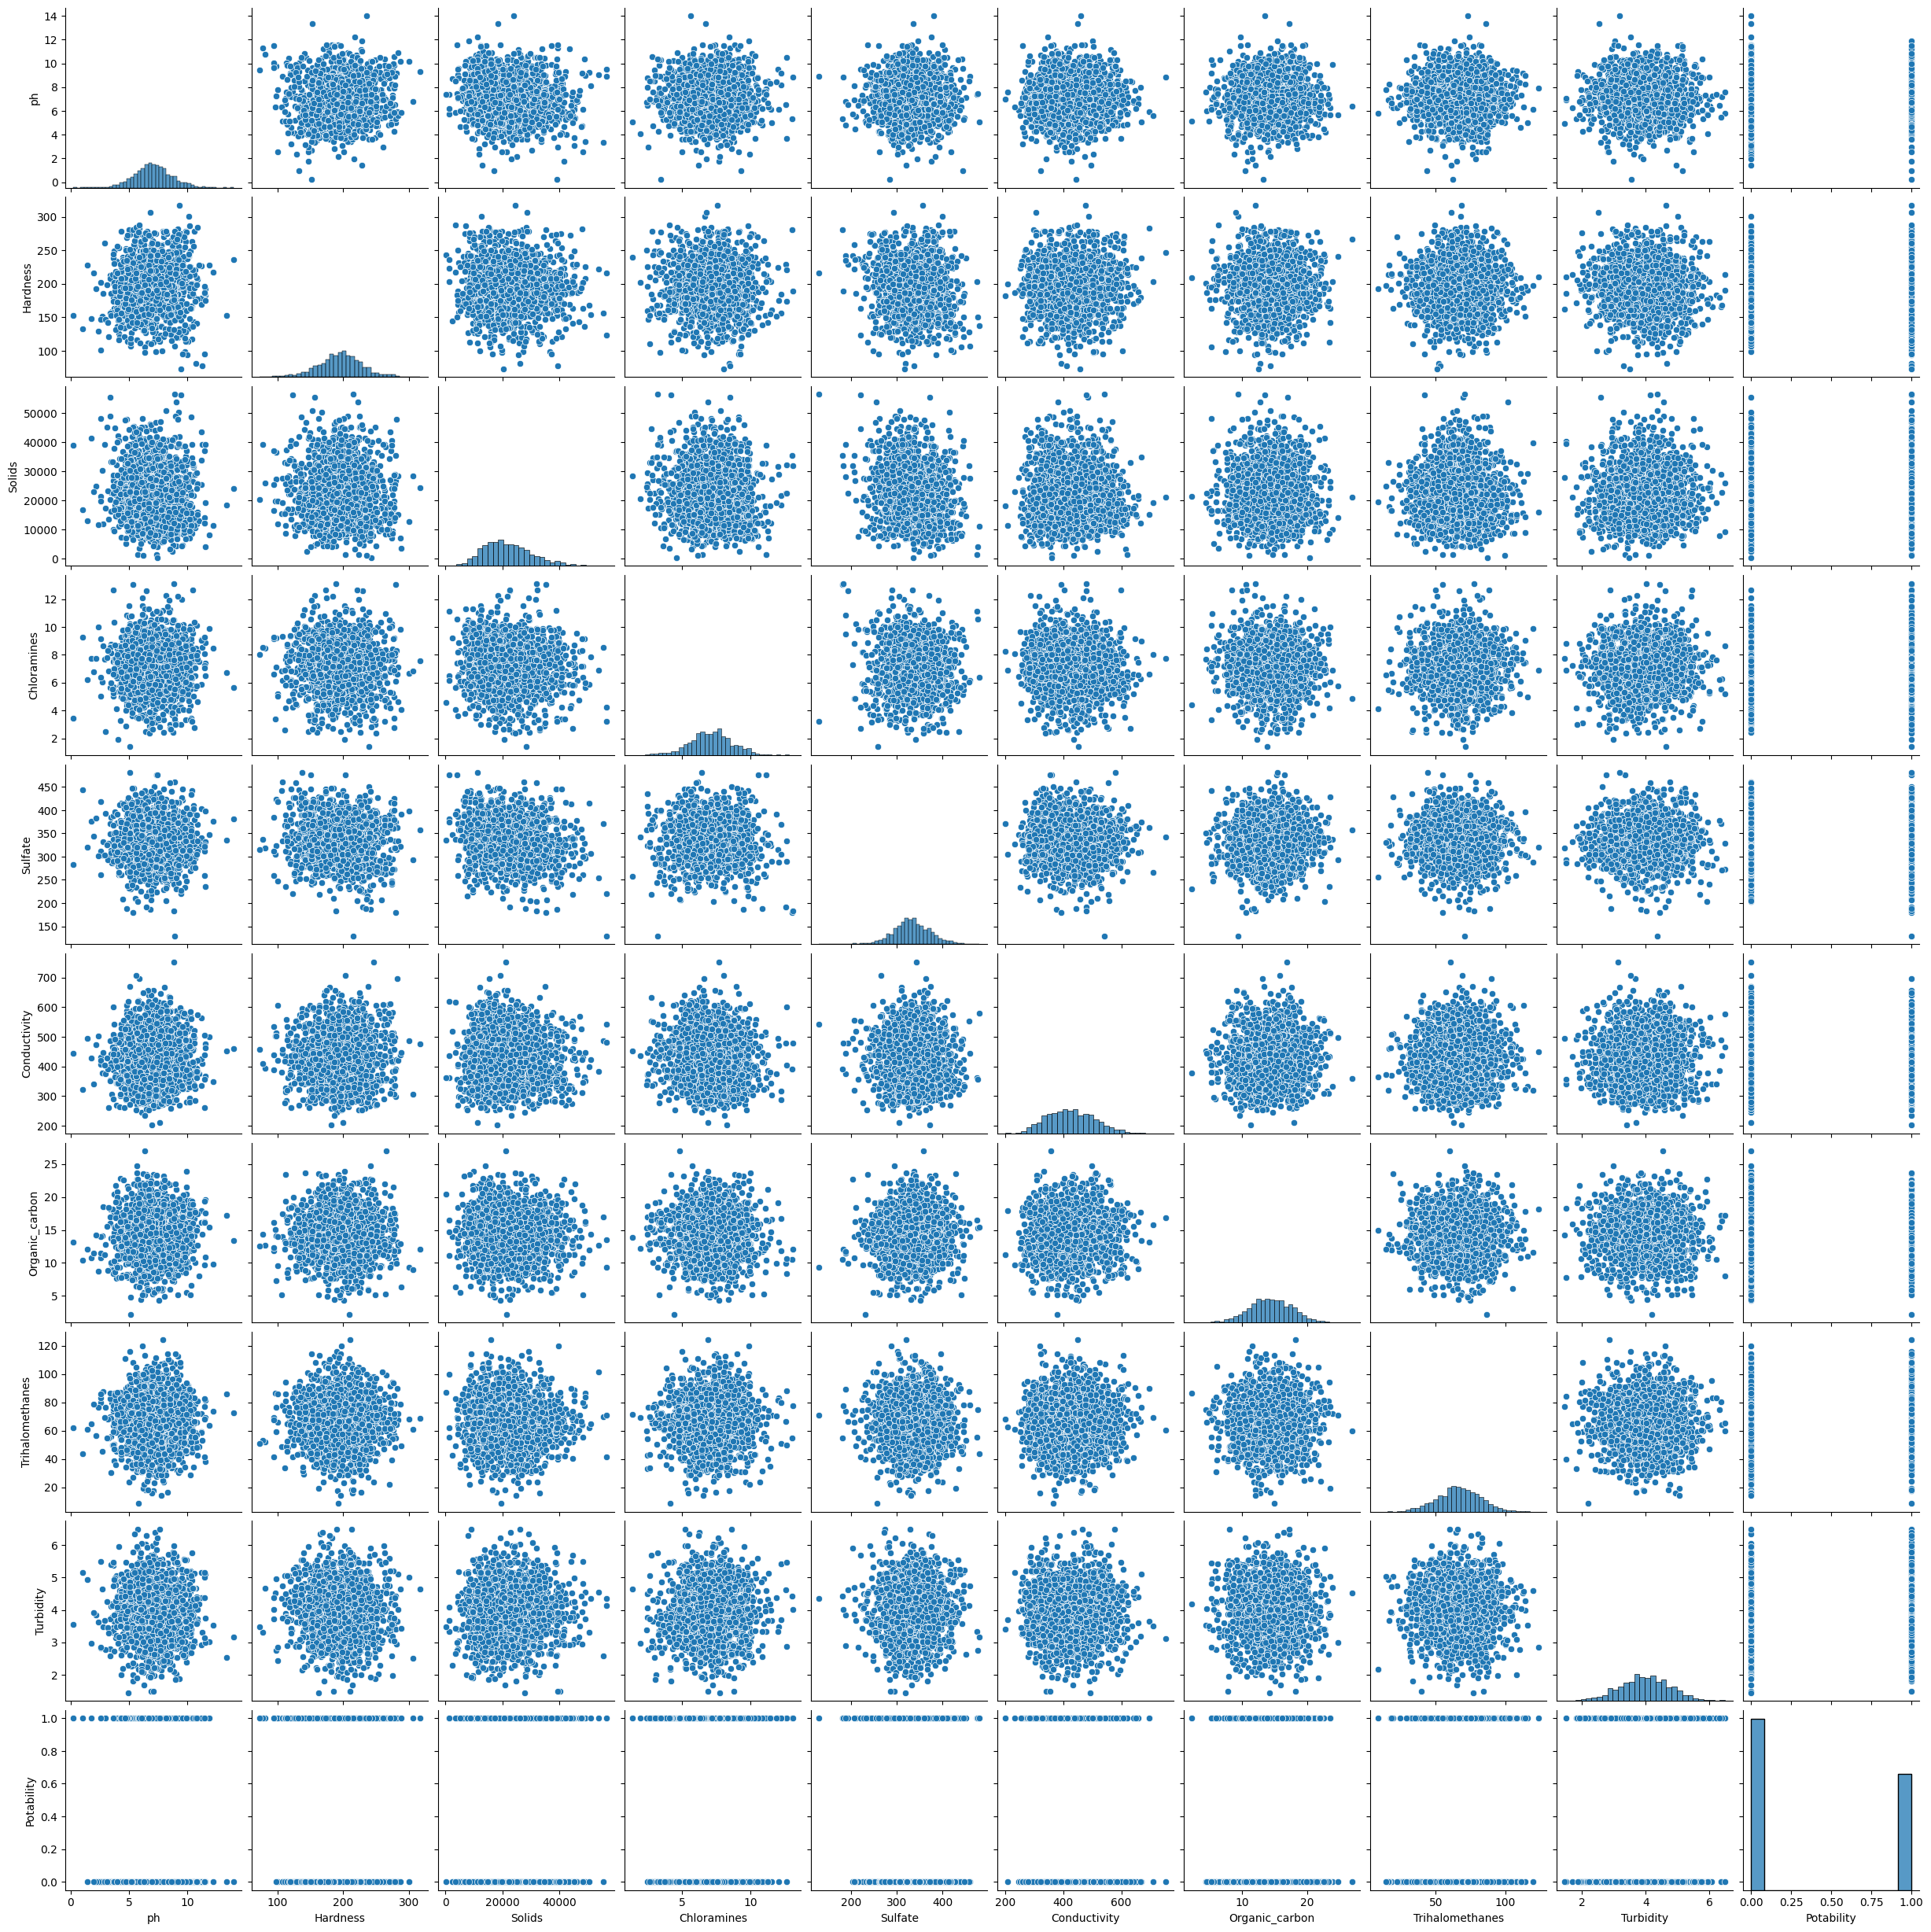

In [13]:
sns.pairplot(df)

In [14]:
import plotly.express as px
fig = px.pie(df,names= "Potability",hole = 0.3, template="plotly_dark")
fig.show()

In [15]:
fig = px.scatter(df,x ="ph",y="Sulfate",color="Potability",template="plotly_dark")
fig.show()

In [16]:
fig = px.scatter(df,x ="Turbidity",y="Solids",color="Turbidity",template="plotly_dark")
fig.show()

In [17]:
fig = px.scatter(df,x ="Trihalomethanes",y="Chloramines",color="Trihalomethanes",template="plotly_dark")
fig.show()

Text(0, 0.5, 'Percentage of missing values')

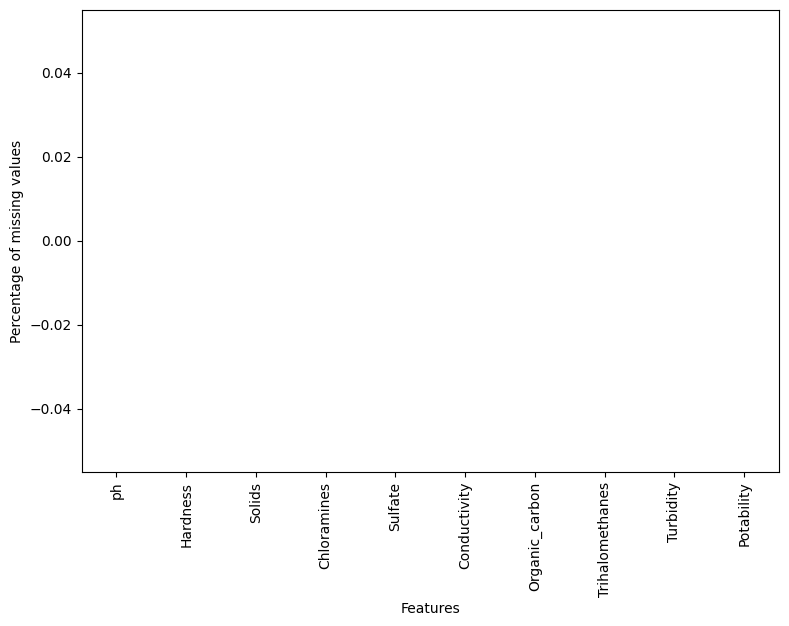

In [18]:
df.isnull().mean().plot.bar(figsize = (9,6))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")


In [19]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())


In [20]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

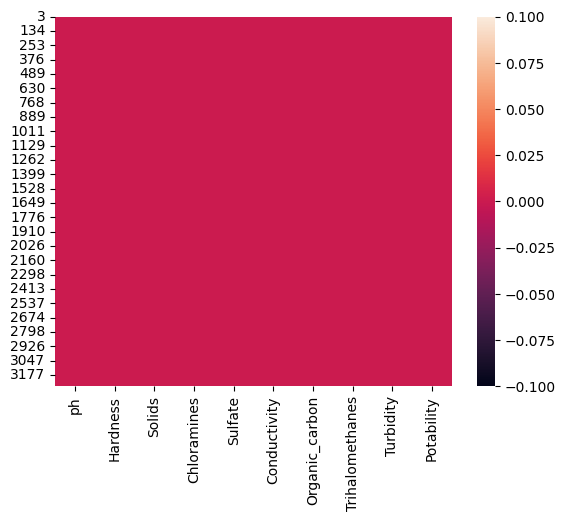

In [21]:
sns.heatmap(df.isnull())

In [22]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [23]:
x = df.drop("Potability",axis=1)
y = df["Potability"]


In [24]:
x.shape , y.shape

((2011, 9), (2011,))

In [25]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.7824658 ,  0.56411376,  0.01168692, ...,  1.22703167,
         2.11165179,  0.84476056],
       [ 1.27546291, -0.45565257, -0.45583491, ..., -0.84215371,
        -2.14039865,  0.13503344],
       [-0.95483488, -0.23461412,  0.7906452 , ..., -1.79234008,
        -0.7144228 , -1.80736621],
       ...,
       [ 2.8004919 , -3.10036538,  1.76750279, ...,  0.54602107,
        -1.5455849 ,  0.51212515],
       [-0.64615977, -0.28531709,  0.48857575, ..., -0.6889287 ,
        -0.3721083 , -0.3845623 ],
       [-1.53717226, -0.07007504,  2.9702871 , ..., -0.139372  ,
         0.01784567,  0.59743748]], shape=(2011, 9))

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
x_train.shape ,x_test.shape

((1608, 9), (403, 9))

In [28]:
# Assume the target variable is 'Water_Quality_Index'
X = df.drop(columns=['ph'])  # Features
y = df['ph']  # Target variable


In [29]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# to standardize features

Lasso Regression

In [30]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
# to train Lasso reg model

Lasso(alpha=0.1)

In [31]:
y_pred = lasso.predict(x_test)
# to predict on test data

In [32]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
#to evaluate model performance

In [33]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.24550661853596356
R-squared Score: -0.003535800105892495


In [34]:

# Display feature importance
feature_importance = pd.Series(lasso.coef_, index=df.drop(columns=['ph']).columns)
print("\nFeature Importance (Lasso Coefficients):")
print(feature_importance[feature_importance != 0])  # Only non-zero coefficients



Feature Importance (Lasso Coefficients):
Series([], dtype: float64)


In [35]:
y_pred_continuous = lasso.predict(x_test)

# Convert predictions to binary class (0 or 1)
y_pred_class = np.where(y_pred_continuous >= 0.5, 1, 0)

# Calculate accuracy
accuracy_score_lar = accuracy_score(y_test, y_pred_class)
print("Accuracy Score (Lasso):", accuracy_score_lar*100)

Accuracy Score (Lasso): 57.32009925558312


Decision Tree

In [36]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth= 4)

In [37]:
#train Decision
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [38]:
#making prediction using DT
pred_dt = model_dt.predict(x_test)

In [39]:
#check the accuracy
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

63.27543424317618

In [40]:
cm2 = confusion_matrix(y_test,pred_dt)
cm2

array([[195,  36],
       [112,  60]])

Random Forest Classifier

In [41]:
model_rf = RandomForestClassifier()

In [42]:
#training the model
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
#prediciton
pred_rf = model_rf.predict(x_test)

In [44]:
accuracy_score_rf = accuracy_score(y_test,pred_rf)
accuracy_score_rf*100


69.4789081885856

In [45]:
cm3 = confusion_matrix(y_test,pred_rf)
cm3

array([[212,  19],
       [104,  68]])

KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
#crateing the model object


In [47]:
for i in range(4,20):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(x_train,y_train)
  pred_knn = model_knn.predict(x_test)
  accuracy_score_knn = accuracy_score(y_test,pred_knn)
  print(i,accuracy_score_knn)

4 0.6426799007444168
5 0.6650124069478908
6 0.6575682382133995
7 0.674937965260546
8 0.6426799007444168
9 0.6873449131513648
10 0.6401985111662531
11 0.6650124069478908
12 0.6476426799007444
13 0.6625310173697271
14 0.6625310173697271
15 0.6600496277915633
16 0.6625310173697271
17 0.674937965260546
18 0.6451612903225806
19 0.6674937965260546


In [ ]:
  model_knn = KNeighborsClassifier(n_neighbors=15)
  model_knn.fit(x_train,y_train)
  pred_knn = model_knn.predict(x_test)
  accuracy_score_knn = accuracy_score(y_test, pred_knn)
  print(i,accuracy_score_knn*100)

19 66.00496277915633


c:\Users\nigus\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning:

[20:50:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Accuracy: 64.27%
             Models  Accuracy Score
0     Decision Tree        0.632754
1     Random Forest        0.694789
2               KNN        0.660050
3           XGBoost        0.642680
4  Lasso Regression        0.573201


C:\Users\nigus\AppData\Local\Temp\ipykernel_15960\1079270724.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\nigus\AppData\Local\Temp\ipykernel_15960\1079270724.py:37: UserWarning:


The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.



,Models,Accuracy Score
1,Random Forest,0.694789
2,KNN,0.660050
3,XGBoost,0.642680
0,Decision Tree,0.632754
4,Lasso Regression,0.573201


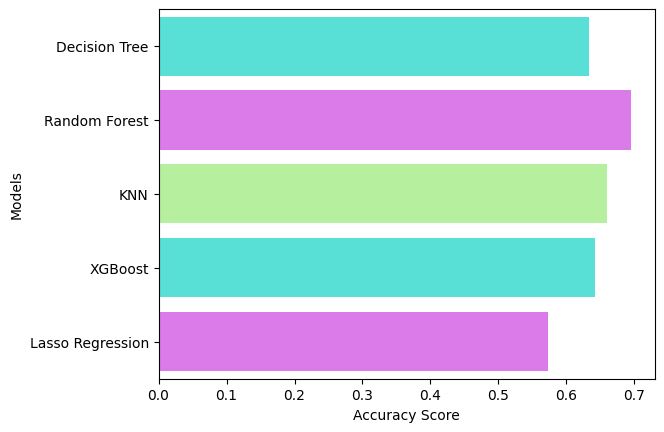

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

# Create a model
model = XGBClassifier(
    learning_rate=0.04, 
    n_estimators=200, 
    max_depth=4, 
    random_state=42, 
    use_label_encoder=False,
    eval_metric='logloss'
)

# First you need to fit the model before predicting
model.fit(x_train, y_train)  # Assuming you have x_train and y_train defined

# Then predict
pred_xgb = model.predict(x_test)

# Calculate accuracy
accuracy_score_xgb = accuracy_score(y_test, pred_xgb)
print(f"XGBoost Accuracy: {accuracy_score_xgb*100:.2f}%")

# Create comparison DataFrame
model_comparison = pd.DataFrame({
    "Models": ["Decision Tree", "Random Forest", "KNN", "XGBoost", "Lasso Regression"],
    "Accuracy Score": [accuracy_score_dt, accuracy_score_rf, accuracy_score_knn,
                      accuracy_score_xgb, accuracy_score_lar]
})

print(model_comparison)

# Plot
colors = ['#42f5e9', '#e968fc', '#b0fc90']
sns.barplot(x="Accuracy Score", y="Models", data=model_comparison, palette=colors)

# Sort by accuracy
model_comparison.sort_values(by="Accuracy Score", ascending=False)